In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

Unable to import google auth packages


In [2]:
### Open data
parent_dir = Path('/scratch/orybchuk/wakedynamics/amr-wind-tutorial/02_atmosphere/precursor/post_processing/reformatted')

ds_xy = xr.open_dataset(Path(parent_dir, 'xy-domain.nc'))
ds_xz = xr.open_dataset(Path(parent_dir, 'xz-domain.nc'))

In [3]:
### Directory to save data
outdir = Path('/projects/wakedynamics/orybchuk/amr-wind-tutorial/02_atmosphere/precursor/figs')
outdir.mkdir(exist_ok=True)

# Plot single frames

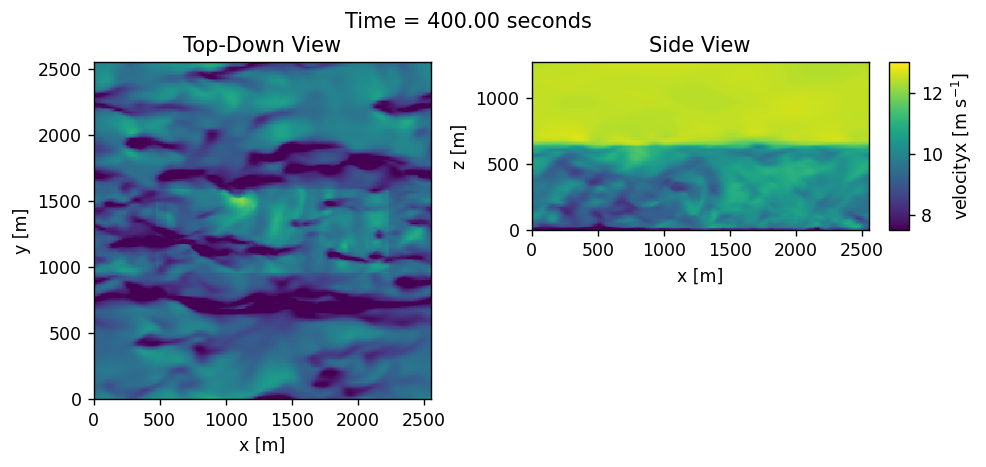

In [4]:
### Visualize both xy and xz planes of just one variable
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, dpi=125)

## Select data
plotvar = 'velocityx'
if plotvar == 'velocityx':
    plotmin = 7.5
    plotmax = 13.0
else:
    raise NotImplementedError
    
tind = 400
yind = 0
zind = 0

plt.suptitle(f"Time = {ds_xy['time'].isel(time=tind).values:.2f} seconds", y=0.98)
plt.subplots_adjust(wspace=0.3)

## Decorate
for axs in ax:
    axs.set_anchor('N')

xmin, xmax = ds_xy['x'].min(), ds_xy['x'].max()
ymin, ymax = ds_xy['y'].min(), ds_xy['y'].max()
zmin, zmax = ds_xz['z'].min(), ds_xz['z'].max()
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(zmin, zmax)
# ax[0].set_aspect((ymax-ymin)/(xmax-xmin))
# ax[1].set_aspect((ymax-ymin)/(xmax-xmin))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("y [m]")
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("z [m]")

ax[0].set_title("Top-Down View")
ax[1].set_title("Side View")

## Plot
im0 = ax[0].pcolormesh(ds_xy['x'],
                   ds_xy['y'],
                   ds_xy[plotvar].isel(z=zind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin,
                   vmax=plotmax)

im1 = ax[1].pcolormesh(ds_xz['x'],
                   ds_xz['z'],
                   ds_xz[plotvar].isel(y=yind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin,
                   vmax=plotmax)

## Colorbars
cax0 = fig.add_axes([ax[1].get_position().x1+0.02,
                    ax[1].get_position().y0,
                    0.02,
                    ax[1].get_position().y1-ax[1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label(f'{plotvar}'+' [m s$^{-1}$]')
cbar0.ax.tick_params()

# plt.savefig(f'figs/onevar_{plotvar}_{tind}.png', bbox_inches='tight')

plt.show()

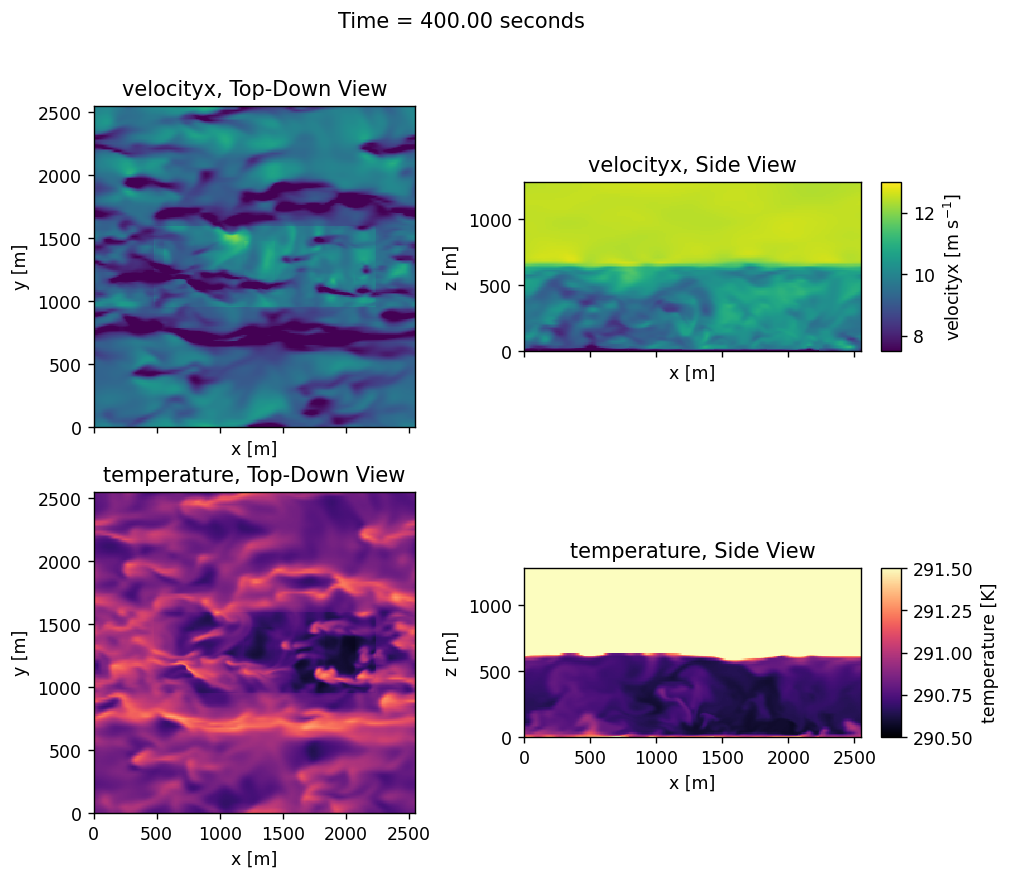

In [5]:
### Visualize both xy and xz planes of two variables
fig, ax = plt.subplots(2, 2, figsize=(8,7.5), sharex=True, dpi=125)

## Select data
plotvar0 = 'velocityx'
plotvar1 = 'temperature'
plotmin0, plotmax0 = 7.5, 13.0
plotmin1, plotmax1 = 290.5, 291.5
cmap0 = 'viridis'
cmap1 = 'magma'

# if plotvar == 'velocityx':
#     plotmin = 7.5
#     plotmax = 15.0
# else:
#     raise NotImplementedError
    
tind = 400
yind = 0
zind = 0

plt.suptitle(f"Time = {ds_xy['time'].isel(time=tind).values:.2f} seconds", y=0.98)
plt.subplots_adjust(wspace=0.3)

## Decorate
xmin, xmax = ds_xy['x'].min(), ds_xy['x'].max()
ymin, ymax = ds_xy['y'].min(), ds_xy['y'].max()
zmin, zmax = ds_xz['z'].min(), ds_xz['z'].max()

for axs in ax[:,0]:
    axs.set_xlim(xmin, xmax)
    axs.set_ylim(ymin, ymax)
    axs.set_xlabel("x [m]")
    axs.set_ylabel("y [m]")
for axs in ax[:,1]:
    axs.set_xlim(xmin, xmax)
    axs.set_ylim(zmin, 1280)
    axs.set_xlabel("x [m]")
    axs.set_ylabel("z [m]")
for axs in ax.flatten():
    axs.set_aspect('equal')


ax[0,0].set_title(f"{plotvar0}, Top-Down View")
ax[0,1].set_title(f"{plotvar0}, Side View")
ax[1,0].set_title(f"{plotvar1}, Top-Down View")
ax[1,1].set_title(f"{plotvar1}, Side View")

## Plot
im00 = ax[0,0].pcolormesh(ds_xy['x'],
                   ds_xy['y'],
                   ds_xy[plotvar0].isel(z=zind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin0,
                   vmax=plotmax0,
                   cmap=cmap0)
im01 = ax[0,1].pcolormesh(ds_xz['x'],
                   ds_xz['z'],
                   ds_xz[plotvar0].isel(y=yind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin0,
                   vmax=plotmax0,
                   cmap=cmap0)

im10 = ax[1,0].pcolormesh(ds_xy['x'],
                   ds_xy['y'],
                   ds_xy[plotvar1].isel(z=zind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin1,
                   vmax=plotmax1,
                   cmap=cmap1)
im11 = ax[1,1].pcolormesh(ds_xz['x'],
                   ds_xz['z'],
                   ds_xz[plotvar1].isel(y=yind, time=tind).values.T,
                   shading='auto',
                   vmin=plotmin1,
                   vmax=plotmax1,
                   cmap=cmap1)

# Colorbars
cax0 = fig.add_axes([ax[0,1].get_position().x1+0.02,
                    ax[0,1].get_position().y0,
                    0.02,
                    ax[0,1].get_position().y1-ax[0,1].get_position().y0])
cbar0 = fig.colorbar(im00, cax=cax0)
cbar0.set_label(f'{plotvar0}'+' [m s$^{-1}$]')
cbar0.ax.tick_params()

cax1 = fig.add_axes([ax[1,1].get_position().x1+0.02,
                    ax[1,1].get_position().y0,
                    0.02,
                    ax[1,1].get_position().y1-ax[1,1].get_position().y0])
cbar1 = fig.colorbar(im10, cax=cax1)
cbar1.set_label(f'{plotvar1}'+' [K]')
cbar1.ax.tick_params()

# plt.savefig(f'figs/twovar_{plotvar1}_{plotvar2}_{tind}.png', bbox_inches='tight')

plt.show()

# Video!

In [6]:
### Visualize both xy and xz planes of two variables
for tind in range(len(ds_xy['time'])):
    fig, ax = plt.subplots(2, 2, figsize=(8,7.5), sharex=True, dpi=125)

    ## Select data
    plotvar0 = 'velocityx'
    plotvar1 = 'temperature'
    plotmin0, plotmax0 = 7.5, 15.0
    plotmin1, plotmax1 = 290.5, 291.5
    cmap0 = 'viridis'
    cmap1 = 'magma'

    # if plotvar == 'velocityx':
    #     plotmin = 7.5
    #     plotmax = 15.0
    # else:
    #     raise NotImplementedError

    yind = 0
    zind = 0

    plt.suptitle(f"Time = {ds_xy['time'].isel(time=tind).values:.2f} seconds", y=0.98)
    plt.subplots_adjust(wspace=0.3)

    ## Decorate
    xmin, xmax = ds_xy['x'].min(), ds_xy['x'].max()
    ymin, ymax = ds_xy['y'].min(), ds_xy['y'].max()
    zmin, zmax = ds_xz['z'].min(), ds_xz['z'].max()

    for axs in ax[:,0]:
        axs.set_xlim(xmin, xmax)
        axs.set_ylim(ymin, ymax)
        axs.set_xlabel("x [m]")
        axs.set_ylabel("y [m]")
    for axs in ax[:,1]:
        axs.set_xlim(xmin, xmax)
        axs.set_ylim(zmin, 640)
        axs.set_xlabel("x [m]")
        axs.set_ylabel("z [m]")
    for axs in ax.flatten():
        axs.set_aspect('equal')


    ax[0,0].set_title(f"{plotvar0}, Top-Down View")
    ax[0,1].set_title(f"{plotvar0}, Side View")
    ax[1,0].set_title(f"{plotvar1}, Top-Down View")
    ax[1,1].set_title(f"{plotvar1}, Side View")

    ## Plot
    im00 = ax[0,0].pcolormesh(ds_xy['x'],
                       ds_xy['y'],
                       ds_xy[plotvar0].isel(z=zind, time=tind).values.T,
                       shading='auto',
                       vmin=plotmin0,
                       vmax=plotmax0,
                       cmap=cmap0)
    im01 = ax[0,1].pcolormesh(ds_xz['x'],
                       ds_xz['z'],
                       ds_xz[plotvar0].isel(y=yind, time=tind).values.T,
                       shading='auto',
                       vmin=plotmin0,
                       vmax=plotmax0,
                       cmap=cmap0)

    im10 = ax[1,0].pcolormesh(ds_xy['x'],
                       ds_xy['y'],
                       ds_xy[plotvar1].isel(z=zind, time=tind).values.T,
                       shading='auto',
                       vmin=plotmin1,
                       vmax=plotmax1,
                       cmap=cmap1)
    im11 = ax[1,1].pcolormesh(ds_xz['x'],
                       ds_xz['z'],
                       ds_xz[plotvar1].isel(y=yind, time=tind).values.T,
                       shading='auto',
                       vmin=plotmin1,
                       vmax=plotmax1,
                       cmap=cmap1)

    # Colorbars
    cax0 = fig.add_axes([ax[0,1].get_position().x1+0.02,
                        ax[0,1].get_position().y0,
                        0.02,
                        ax[0,1].get_position().y1-ax[0,1].get_position().y0])
    cbar0 = fig.colorbar(im00, cax=cax0)
    cbar0.set_label(f'{plotvar0}'+' [m s$^{-1}$]')
    cbar0.ax.tick_params()

    cax1 = fig.add_axes([ax[1,1].get_position().x1+0.02,
                        ax[1,1].get_position().y0,
                        0.02,
                        ax[1,1].get_position().y1-ax[1,1].get_position().y0])
    cbar1 = fig.colorbar(im10, cax=cax1)
    cbar1.set_label(f'{plotvar1}'+' [K]')
    cbar1.ax.tick_params()

    plt.savefig(f'figs/two_var_{str(tind).zfill(4)}.jpeg', bbox_inches='tight')

    plt.close()